In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.torch_adapter import TorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_dataset_cfg

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.USC_HAD)

cfg.parallelize = False
cfg.in_memory = False
force_recompute = True
#force_recompute = [False, True, True]

In [3]:
dataset = TorchAdapter(cfg)
dataset.preprocess(force_recompute)
dataset.postprocess(split_group_index=0, force_recompute=force_recompute)

2025-12-03 09:11:29,499 - whar-datasets - INFO - Forcing recompute
2025-12-03 09:11:29,500 - whar-datasets - INFO - Running DownloadingStep
2025-12-03 09:11:29,502 - whar-datasets - INFO - Checking hash for DownloadingStep
2025-12-03 09:11:29,504 - whar-datasets - INFO - Hash is up to date
2025-12-03 09:11:29,505 - whar-datasets - INFO - Downloading usc_had to datasets\usc_had\data\USC-HAD.zip


2025-12-03 09:11:33,498 - whar-datasets - INFO - Extracting usc_had
2025-12-03 09:11:35,793 - whar-datasets - INFO - Forcing recompute
2025-12-03 09:11:35,794 - whar-datasets - INFO - Running ParsingStep
2025-12-03 09:11:35,794 - whar-datasets - INFO - Checking hash for ParsingStep
2025-12-03 09:11:35,794 - whar-datasets - INFO - Hash is up to date
2025-12-03 09:11:35,794 - whar-datasets - INFO - Checking download
2025-12-03 09:11:35,794 - whar-datasets - INFO - Download exists
2025-12-03 09:11:35,794 - whar-datasets - INFO - Parsing to common format


Suche nach .mat Dateien in: datasets\usc_had\data\USC-HAD
Fehler bei a11t4.mat: 'activity_number'

--- Fertig! ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2809281 entries, 0 to 2809280
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Ax           float64       
 1   Ay           float64       
 2   Az           float64       
 3   GyroX        float64       
 4   GyroY        float64       
 5   GyroZ        float64       
 6   subject_id   object        
 7   activity_id  object        
 8   timestamp    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 192.9+ MB
None
         Ax        Ay        Az     GyroX     GyroY     GyroZ subject_id  \
0 -0.653698  0.711878 -0.423886 -0.203916 -0.309533 -0.464422          1   
1 -0.646831  0.708259 -0.420226  0.103647 -0.161285 -0.241990          1   
2 -0.650265  0.711878 -0.423886  0.069611 -0.108322 -0.162525          1   
3 -0.646831  0.711878 -0.423

Creating sessions: 100%|██████████| 170/170 [00:04<00:00, 36.95it/s]
2025-12-03 09:11:48,524 - whar-datasets - INFO - Saving common format
Caching sessions: 100%|██████████| 170/170 [00:02<00:00, 73.10it/s]
2025-12-03 09:11:51,164 - whar-datasets - INFO - Forcing recompute
2025-12-03 09:11:51,164 - whar-datasets - INFO - Running WindowingStep
2025-12-03 09:11:51,164 - whar-datasets - INFO - Checking hash for WindowingStep
2025-12-03 09:11:51,164 - whar-datasets - INFO - Hash is not up to date
2025-12-03 09:11:51,406 - whar-datasets - INFO - Validating common format
Validating sessions: 100%|██████████| 170/170 [00:00<00:00, 185.34it/s]
2025-12-03 09:11:52,325 - whar-datasets - INFO - Common format validated.
2025-12-03 09:11:52,328 - whar-datasets - INFO - Compute windowing
2025-12-03 09:11:52,329 - whar-datasets - INFO - Selecting activities
Processing sessions: 100%|██████████| 170/170 [00:10<00:00, 16.89it/s]
2025-12-03 09:12:02,423 - whar-datasets - INFO - Saving windowing
Caching 

In [4]:
loaders = dataset.get_dataloaders(batch_size=32)

train_loader = loaders["train"]
test_loader = loaders["test"]
val_loader = loaders["val"]

In [5]:
weights = dataset.get_class_weights(test_loader)
print(weights)

{0: 0.4336178994234996, 9: 0.5222065025315265, 1: 0.5278826601677387, 2: 0.5922585943345361, 7: 0.6390158517819995, 8: 0.7961508973021633, 3: 1.0333022284134459, 4: 1.0792267718984878, 5: 1.1845171886690722, 10: 1.3125731009576205, 11: 1.566619507594579, 6: 2.3126287969253316}


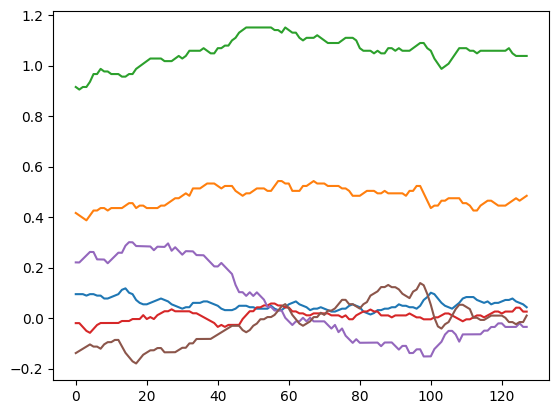

In [6]:
y_batch, x_batch = next(iter(train_loader))
x = x_batch[0].numpy()
plt.plot(x)
plt.show()